In [633]:
import os
os.getcwd()

'C:\\Users\\Ashu\\Desktop\\Remote Internship 2020\\Data Sets'

In [634]:
os.chdir("C:/Users/Ashu/Desktop/Remote Internship 2020/Data Sets")

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import pickle
from sklearn.externals import joblib
%matplotlib inline

In [636]:
data=pd.read_csv("indian_liver_patient.csv")

In [637]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Removing Missing Data

In [638]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

## Observation

We could find only 4 null values in the feature 'Albumin_and_Globulin_Ratio'

In [639]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [640]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Observation
The Null values where removed by filling in the values of null with mean value of the feature 'Albumin_and_Globulin_Ratio'.

# Changing Categorical variables to Continous variables 

In [641]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 47.9+ KB


# Observation
Only Gender feature could be seen as a object remaining all being int or float features we would be changing this categorical variable into continous variable


In [642]:
data['Gender']=data['Gender'].apply(lambda x:0 if x=='Male' else 1)
data['Dataset']=data['Dataset'].apply(lambda x:0 if x==1 else 1)

In [643]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,0


## Observation
The Gender is changed  such that Females are indicated as 0's  and Male's are indicated as 1.  
Also the Dataset indicating the patient being diagonosed with Liver diesease has been changed to 0 and 1 where 0 depicting presence of liver disease and 1 depicting no liver disease


# Data Visualization

0    416
1    167
Name: Dataset, dtype: int64

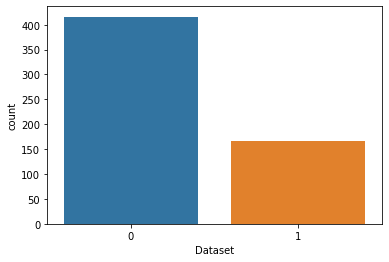

In [644]:
sns.countplot(data=data, x = 'Dataset', label='Count')
data['Dataset'].value_counts()

## Observation

The total number of patitents who were diagosed with Liver Diesease are : 416 and  
The total number of patitents who weren't diagosed with Liver Diesease are : 167

In [645]:
pd.crosstab(data['Dataset'],data['Gender'],margins=True)

Gender,0,1,All
Dataset,,,
0,324,92,416
1,117,50,167
All,441,142,583


## Observation 
The total number of male patients are much higher than female patients depicting Gender could be a cause of Liver disease

In [646]:
data.pivot_table(data,index=['Dataset'])

,Age,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Alkaline_Phosphotase,Aspartate_Aminotransferase,Direct_Bilirubin,Gender,Total_Bilirubin,Total_Protiens
Dataset,,,,,,,,,,
0,46.153846,99.605769,3.060577,0.914337,319.007212,137.699519,1.923558,0.221154,4.164423,6.459135
1,41.239521,33.652695,3.344311,1.028588,219.754491,40.688623,0.396407,0.299401,1.142515,6.543114


In [647]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


## Observation

Some of the features are closely related to each other like  
1. Total_Bilirubin and Direct_Bilirubin  
2.  Alamine_Aminotransferase and Aspartate_Aminotransferase  
3. Total_Protiens and Albumin  
  
Hence any one  feature in each set of features could be removed for dimensionality reduction.


In [648]:
data=data.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase'], axis = 1)

In [649]:
data

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,187,16,6.8,3.3,0.90,0
1,62,0,10.9,699,64,7.5,3.2,0.74,0
2,62,0,7.3,490,60,7.0,3.3,0.89,0
3,58,0,1.0,182,14,6.8,3.4,1.00,0
4,72,0,3.9,195,27,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,500,20,5.9,1.6,0.37,1
579,40,0,0.6,98,35,6.0,3.2,1.10,0
580,52,0,0.8,245,48,6.4,3.2,1.00,0
581,31,0,1.3,184,29,6.8,3.4,1.00,0


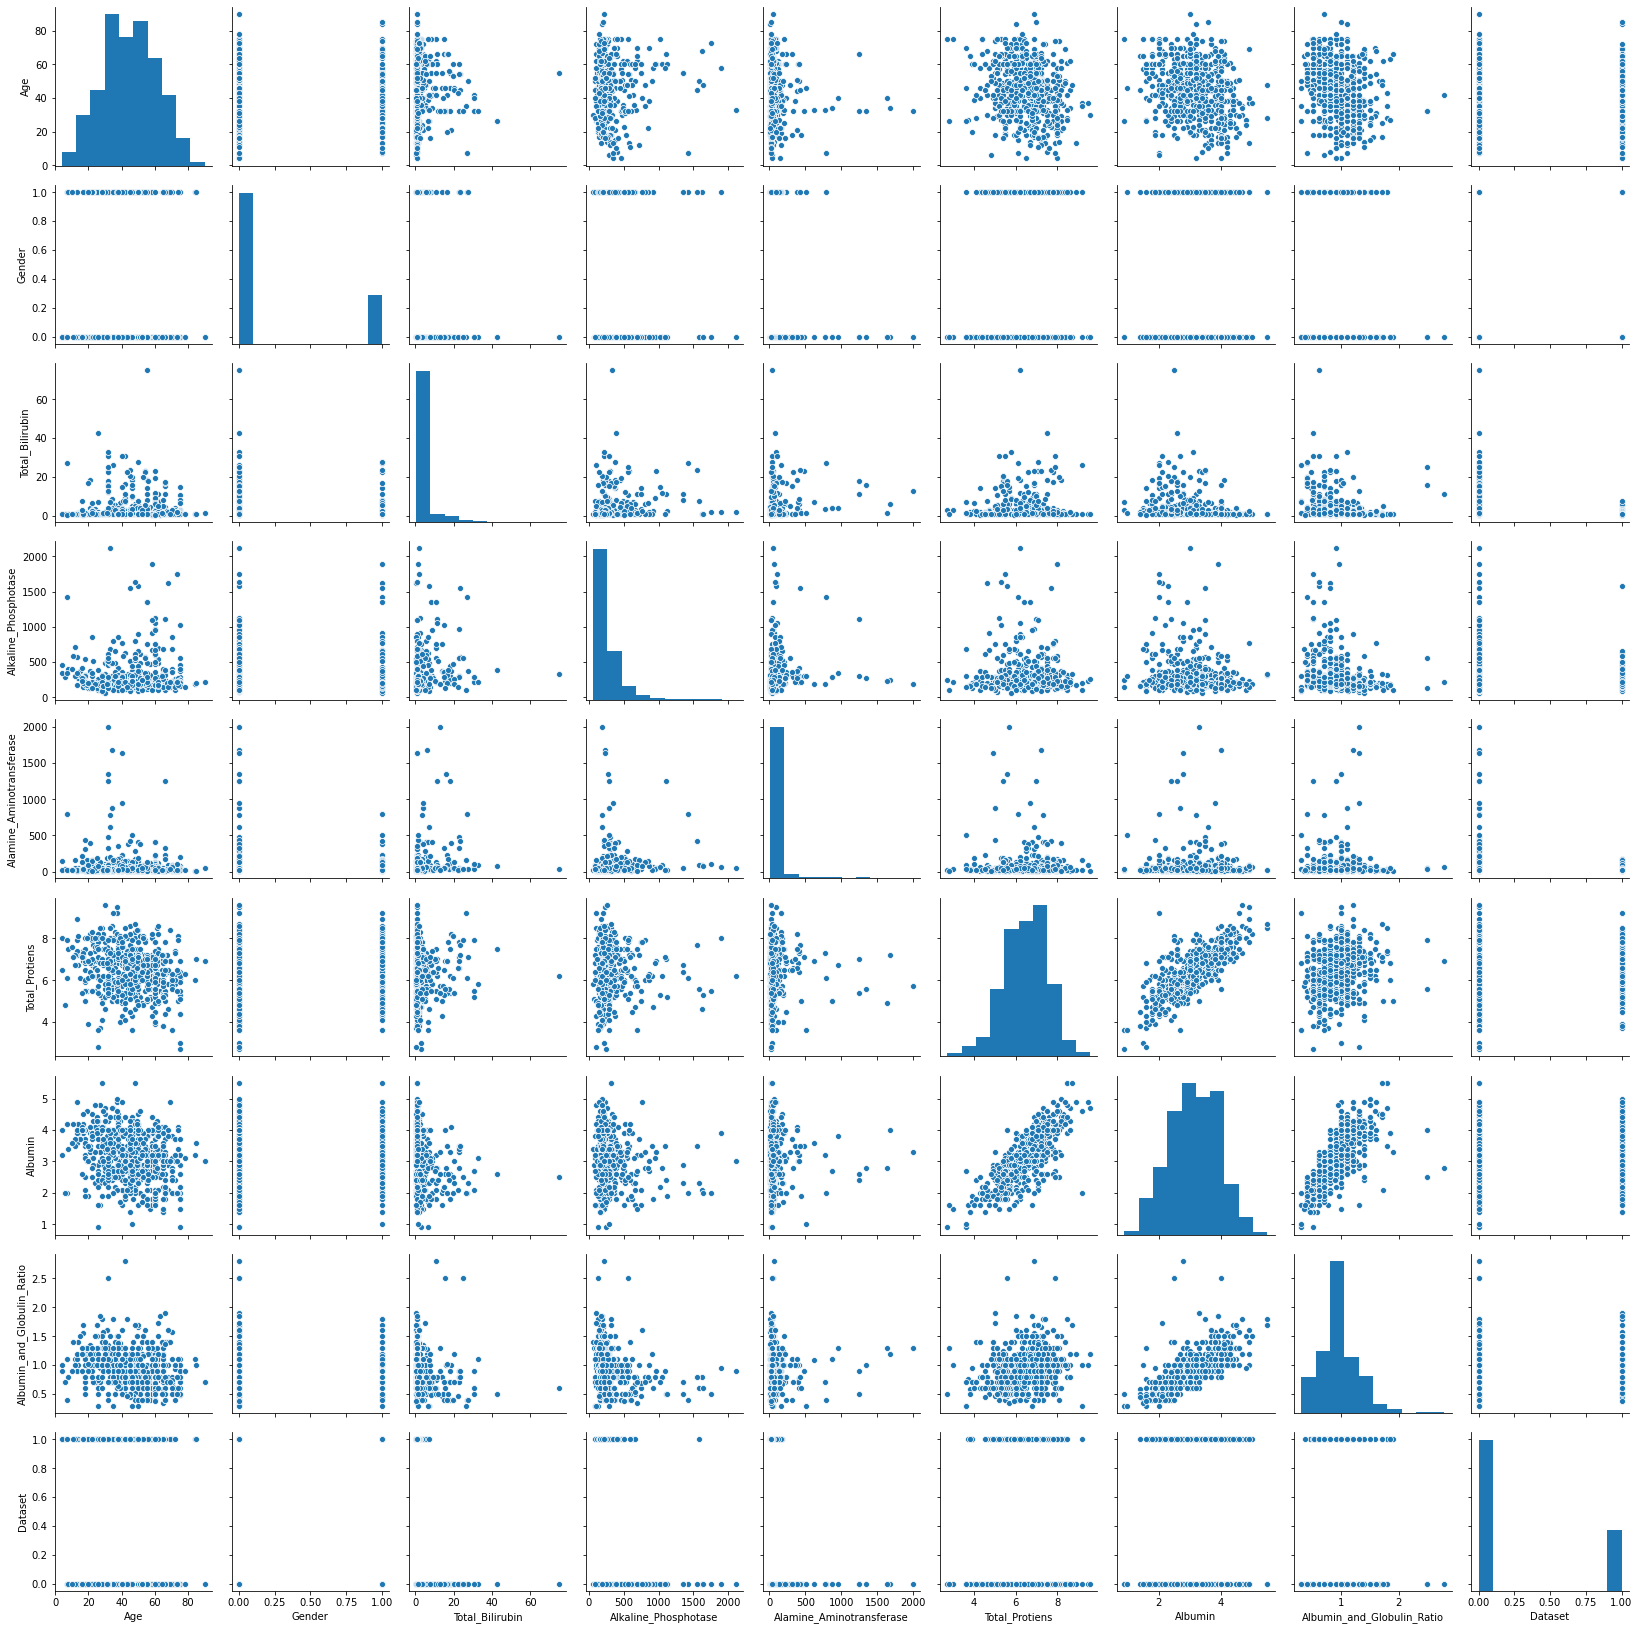

In [650]:
sns.pairplot(data)

## Observation

Total_Bilirubin, Alamine_Aminotransferase could be the possible factors causing The Liver Diesease

# Feature Scaling 

In [651]:
data_features=data.drop(['Gender','Dataset'], axis = 1)

In [652]:
data_features

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,187,16,6.8,3.3,0.90
1,62,10.9,699,64,7.5,3.2,0.74
2,62,7.3,490,60,7.0,3.3,0.89
3,58,1.0,182,14,6.8,3.4,1.00
4,72,3.9,195,27,7.3,2.4,0.40
...,...,...,...,...,...,...,...
578,60,0.5,500,20,5.9,1.6,0.37
579,40,0.6,98,35,6.0,3.2,1.10
580,52,0.8,245,48,6.4,3.2,1.00
581,31,1.3,184,29,6.8,3.4,1.00


In [653]:
data_features.describe()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,290.576329,80.713551,6.483190,3.141852,0.947064
std,16.189833,6.209522,242.937989,182.620356,1.085451,0.795519,0.318492
min,4.000000,0.400000,63.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,175.500000,23.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,208.000000,35.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,298.000000,60.500000,7.200000,3.800000,1.100000
max,90.000000,75.000000,2110.000000,2000.000000,9.600000,5.500000,2.800000


## Observation
As the values of features have different ranges we will perform scaling

In [654]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
data_features_scaled.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-0.418878,-0.426715,-0.354665,0.292120,0.198969,-0.147898
1,1.066637,1.225171,1.682629,-0.091599,0.937566,0.073157,-0.650697
2,1.066637,0.644919,0.821588,-0.113522,0.476533,0.198969,-0.179323
3,0.819356,-0.370523,-0.447314,-0.365626,0.292120,0.324781,0.166351
4,1.684839,0.096902,-0.393756,-0.294379,0.753153,-0.933340,-1.719144


# Feature Engineering 

In [655]:
x=data_features_scaled.iloc[:,:]
x

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-0.418878,-0.426715,-0.354665,0.292120,0.198969,-0.147898
1,1.066637,1.225171,1.682629,-0.091599,0.937566,0.073157,-0.650697
2,1.066637,0.644919,0.821588,-0.113522,0.476533,0.198969,-0.179323
3,0.819356,-0.370523,-0.447314,-0.365626,0.292120,0.324781,0.166351
4,1.684839,0.096902,-0.393756,-0.294379,0.753153,-0.933340,-1.719144
...,...,...,...,...,...,...,...
578,0.942997,-0.451114,0.862786,-0.332743,-0.537740,-1.939837,-1.813419
579,-0.293407,-0.434996,-0.793378,-0.250535,-0.445534,0.073157,0.480601
580,0.448435,-0.402760,-0.187766,-0.179288,-0.076707,0.073157,0.166351
581,-0.849789,-0.322169,-0.439074,-0.283418,0.292120,0.324781,0.166351


In [656]:
y=data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64

In [657]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [658]:
x_train

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
400,1.313918,-0.418878,-0.529710,-0.310821,-0.076707,0.073157,0.166351
364,-1.467991,-0.402760,-0.443194,-0.261496,0.292120,0.450593,0.166351
383,0.942997,-0.306051,-0.542070,-0.387549,-1.459807,-0.807528,0.166351
269,-1.158890,-0.434996,-0.743940,-0.360146,-3.396147,-1.939837,1.109099
554,1.746659,-0.241578,-0.290761,-0.332743,0.015500,-0.178468,-0.462147
...,...,...,...,...,...,...,...
243,-1.035250,-0.386642,0.104741,-0.305341,1.859633,2.966834,2.680346
527,-0.293407,0.032430,0.030584,-0.069677,0.568740,0.324781,-0.147898
570,-1.777092,-0.112633,-0.224844,0.275597,-0.998774,-0.681716,-0.147898
537,-2.148013,-0.402760,0.430206,-0.305341,1.029773,0.576405,-0.147898


In [659]:
x_test

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
49,0.633896,2.434031,-0.348439,-0.091599,-0.261120,-1.688212,-1.719144
181,1.870300,-0.064279,-0.299001,-0.261496,-3.211734,-2.065649,0.166351
321,-0.911609,-0.402760,-0.381397,-0.277938,-1.183187,-0.430092,0.480601
98,-1.653452,-0.434996,-0.105370,0.089259,-0.537740,-0.052655,0.480601
352,-1.158890,-0.418878,-0.603867,-0.245055,1.583013,1.457089,0.480601
...,...,...,...,...,...,...,...
131,1.561199,-0.418878,-0.220724,-0.343704,-0.629947,-0.807528,-0.619272
118,-0.787969,2.031078,-0.043572,6.956379,-0.814361,-0.430092,0.166351
88,-1.653452,-0.434996,1.019339,-0.261496,0.937566,0.073157,-0.776397
29,2.426681,-0.418878,-0.422595,-0.371107,-0.445534,0.073157,0.480601


In [660]:
y_train=y_train.astype('int')
y_train

400    1
364    1
383    1
269    0
554    0
      ..
243    0
527    0
570    0
537    0
257    0
Name: Dataset, Length: 408, dtype: int32

In [661]:
y_test=y_test.astype('int')
y_test

49     0
181    0
321    0
98     0
352    0
      ..
131    1
118    0
88     0
29     1
139    0
Name: Dataset, Length: 175, dtype: int32

## Observation
Two variables x and y are created depicting input features and output feature respectively then divided the whole data into Training and Testing data in a 80%-20% ratio

# Training and Testing model

## Modelling using K-Nearest Neighbors 

In [662]:
from sklearn import neighbors
knclf=neighbors.KNeighborsClassifier()
knclf.fit(x_train,y_train)

#K fold testing
knn_acc=cross_val_score(knclf,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
knn_proba=cross_val_predict(knclf,x_train,y_train,cv=3,method="predict_proba")
knn_scores=knn_proba[:,1]
print(knn_acc)

#Score Calculation
knclf_train_score=round(knclf.score(x_train,y_train)*100,2)
knclf_test_score=round(knclf.score(x_test,y_test)*100,2)

[0.66911765 0.75       0.68382353]


In [663]:
#Predicting the values of x_test
kn_y_pred=knclf.predict(x_test)
kn_y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [664]:
kn_cm_test=confusion_matrix(y_test,kn_y_pred)
kn_accuracy=accuracy_score(y_test,kn_y_pred)*100
print("The accuracy of KNN model for the Liiver Patient analysis comes out to be : %f"%kn_accuracy)
print("The ROC Score of KNN model for the Liiver Patient analysis comes out to be : %f" %(roc_auc_score(y_test,kn_y_pred)*100))
print("\nConfusion Matrix :")
kn_cm_test

The accuracy of KNN model for the Liiver Patient analysis comes out to be : 60.000000
The ROC Score of KNN model for the Liiver Patient analysis comes out to be : 51.207983

Confusion Matrix :


array([[90, 29],
       [41, 15]], dtype=int64)

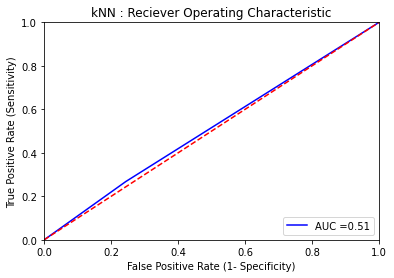

In [665]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,kn_y_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title("kNN : Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.show()

## Modelling using Logistic Regression

In [666]:
#Perform Logistic Regression
from sklearn.linear_model.logistic import LogisticRegression
cls=LogisticRegression(random_state=0)
lr_cls=cls.fit(x_train,y_train)

#K fold testing
lr_acc=cross_val_score(lr_cls,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
lr_proba=cross_val_predict(lr_cls,x_train,y_train,cv=3,method="predict_proba")
lr_scores=lr_proba[:,1]
print(lr_acc)

#Score Calculation
lr_train_score=round(cls.score(x_train,y_train)*100,2)
lr_test_score=round(cls.score(x_test,y_test)*100,2)

[0.72794118 0.73529412 0.71323529]


In [667]:
lr_y_pred=lr_cls.predict(x_test)
lr_y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [668]:
lr_cm_test=confusion_matrix(y_test,lr_y_pred)
lr_accuracy=accuracy_score(y_test,lr_y_pred)*100
print("The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : %f"%lr_accuracy)
print("The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : %f" %(roc_auc_score(y_test,lr_y_pred)*100))
print("\nConfusion Matrix :")
lr_cm_test

The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : 69.714286
The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : 57.405462

Confusion Matrix :


array([[109,  10],
       [ 43,  13]], dtype=int64)

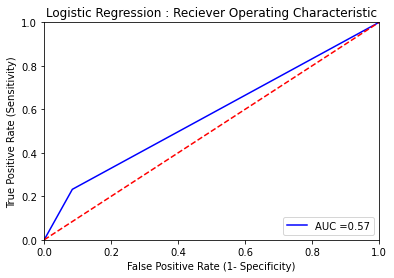

In [669]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,lr_y_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title("Logistic Regression : Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.show()

## Modelling using Naive Bayes Classification 

In [670]:
from sklearn.naive_bayes import GaussianNB
nb_cls=GaussianNB()
nb_cls.fit(x_train,y_train)

#K fold testing
nb_acc=cross_val_score(nb_cls,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
nb_proba=cross_val_predict(nb_cls,x_train,y_train,cv=3,method="predict_proba")
nb_scores=nb_proba[:,1]
print(nb_acc)

#Score Calculation
nb_train_score=round(nb_cls.score(x_train,y_train)*100,2)
nb_test_score=round(nb_cls.score(x_test,y_test)*100,2)

[0.47794118 0.59558824 0.61764706]


In [671]:
nb_y_pred=nb_cls.predict(x_test)
nb_y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [672]:
nb_cm_test=confusion_matrix(y_test,nb_y_pred)
nb_accuracy=accuracy_score(y_test,nb_y_pred)*100
print("The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : %f"%nb_accuracy)
print("The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : %f" %(roc_auc_score(y_test,nb_y_pred)*100))
print("\nConfusion Matrix :")
nb_cm_test

The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : 56.000000
The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : 64.810924

Confusion Matrix :


array([[48, 71],
       [ 6, 50]], dtype=int64)

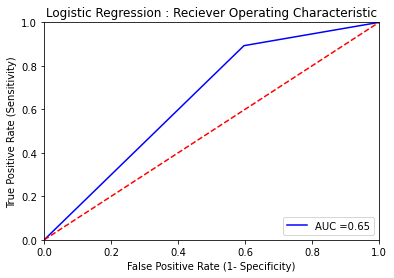

In [673]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,nb_y_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title("Logistic Regression : Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.show()

## Modelling using Support Vector Machines

In [674]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf",probability=True)
svc_cls=svc.fit(x_train,y_train)

#K fold testing
svc_acc=cross_val_score(svc_cls,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_cls,x_train,y_train,cv=3,method="predict_proba")
svc_scores=svc_proba[:,1]
print(svc_acc)

#Score Calculation
svc_train_score=round(svc.score(x_train,y_train)*100,2)
svc_test_score=round(svc.score(x_test,y_test)*100,2)

[0.75735294 0.72794118 0.72794118]


In [675]:
svc_y_pred=svc_cls.predict(x_test)
svc_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [676]:
svc_cm_test=confusion_matrix(y_test,svc_y_pred)
svc_accuracy=accuracy_score(y_test,svc_y_pred)*100
print("The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : %f"%svc_accuracy)
print("The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : %f" %(roc_auc_score(y_test,svc_y_pred)*100))
print("\nConfusion Matrix :")
svc_cm_test

The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : 68.000000
The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : 50.000000

Confusion Matrix :


array([[119,   0],
       [ 56,   0]], dtype=int64)

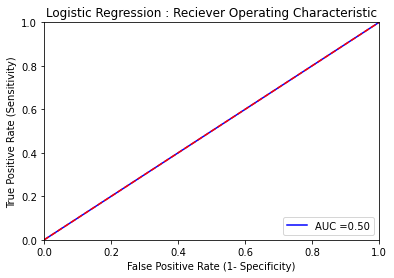

In [677]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,svc_y_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title("Logistic Regression : Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.show()

## Modelling using Decision Tree Classifier

In [678]:
from sklearn.tree import DecisionTreeClassifier
dtc_cls=DecisionTreeClassifier()
dtc_cls.fit(x_train,y_train)

#K fold testing
dtc_acc=cross_val_score(dtc_cls,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_proba=cross_val_predict(dtc_cls,x_train,y_train,cv=3,method="predict_proba")
dtc_scores=dtc_proba[:,1]
print(dtc_acc)

#Score Calculation
dtc_train_score=round(dtc_cls.score(x_train,y_train)*100,2)
dtc_test_score=round(dtc_cls.score(x_test,y_test)*100,2)

[0.625      0.68382353 0.63970588]


In [679]:
dtc_y_pred=dtc_cls.predict(x_test)
dtc_y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [680]:
dtc_cm_test=confusion_matrix(y_test,dtc_y_pred)
dtc_accuracy=accuracy_score(y_test,dtc_y_pred)*100
print("The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : %f"%dtc_accuracy)
print("The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : %f" %(roc_auc_score(y_test,dtc_y_pred)*100))
print("\nConfusion Matrix :")
dtc_cm_test

The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : 62.285714
The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : 53.834034

Confusion Matrix :


array([[92, 27],
       [39, 17]], dtype=int64)

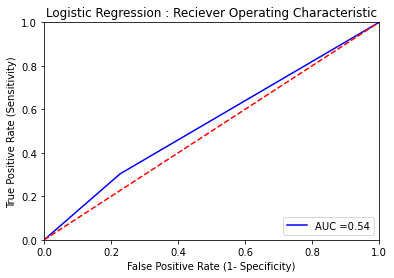

In [681]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,dtc_y_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title("Logistic Regression : Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.show()

## Modelling using Random Forest Classifier 

In [682]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_cls=rmf.fit(x_train,y_train)

#K fold testing
rmf_acc=cross_val_score(rmf_cls,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_cls,x_train,y_train,cv=3,method="predict_proba")
rmf_scores=rmf_proba[:,1]
print(rmf_acc)

#Score Calculation
rmf_train_score=round(rmf.score(x_train,y_train)*100,2)
rmf_test_score=round(rmf.score(x_test,y_test)*100,2)

[0.74264706 0.75       0.72794118]


In [683]:
rmf_y_pred=rmf.predict(x_test)
rmf_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [684]:
rmf_cm_test=confusion_matrix(y_test,rmf_y_pred)
rmf_accuracy=accuracy_score(y_test,rmf_y_pred)*100
print("The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : %f"%rmf_accuracy)
print("The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : %f" %(roc_auc_score(y_test,rmf_y_pred)*100))
print("\nConfusion Matrix :")
rmf_cm_test

The accuracy of Logistic Regression model for the Liiver Patient analysis comes out to be : 69.142857
The ROC Score of Logistic Regression model for the Liiver Patient analysis comes out to be : 53.676471

Confusion Matrix :


array([[115,   4],
       [ 50,   6]], dtype=int64)

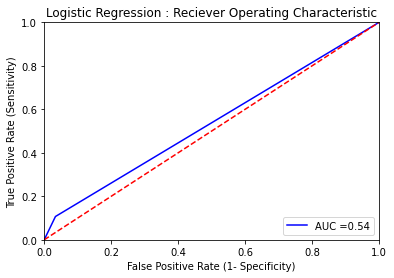

In [685]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,rmf_y_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title("Logistic Regression : Reciever Operating Characteristic")
plt.plot(fpr,tpr,'b',label='AUC =%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.show()

# Model Evaluation

In [686]:
models = pd.DataFrame({
    'Model': ['kNN Classifier','Logistic Regression','Naive Bayes','Decision Tree Classifier','Random Forest'],
    'Training Score': [knclf_train_score,lr_train_score,nb_train_score,dtc_train_score, rmf_train_score],
    'Test Score': [knclf_test_score,lr_test_score,nb_test_score,dtc_test_score, rmf_test_score]})
models.sort_values(by='Test Score', ascending=False)

,Model,Training Score,Test Score
1,Logistic Regression,73.77,69.71
4,Random Forest,76.72,69.14
3,Decision Tree Classifier,100.00,62.29
0,kNN Classifier,80.64,60.00
2,Naive Bayes,57.35,56.00


## Observation
From the above models the best accuracy, training and testing scores are given by two models which are Logistic Regression and Random Forest. I am going to choose Logistic Regression for prediction of Liver Disease

# Converting Model into Pickle model 

In [687]:
data_temp=data.drop(['Gender','Dataset'], axis = 1)
data_temp

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,187,16,6.8,3.3,0.90
1,62,10.9,699,64,7.5,3.2,0.74
2,62,7.3,490,60,7.0,3.3,0.89
3,58,1.0,182,14,6.8,3.4,1.00
4,72,3.9,195,27,7.3,2.4,0.40
...,...,...,...,...,...,...,...
578,60,0.5,500,20,5.9,1.6,0.37
579,40,0.6,98,35,6.0,3.2,1.10
580,52,0.8,245,48,6.4,3.2,1.00
581,31,1.3,184,29,6.8,3.4,1.00


In [688]:
x=data_temp.iloc[:,:]
x

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,187,16,6.8,3.3,0.90
1,62,10.9,699,64,7.5,3.2,0.74
2,62,7.3,490,60,7.0,3.3,0.89
3,58,1.0,182,14,6.8,3.4,1.00
4,72,3.9,195,27,7.3,2.4,0.40
...,...,...,...,...,...,...,...
578,60,0.5,500,20,5.9,1.6,0.37
579,40,0.6,98,35,6.0,3.2,1.10
580,52,0.8,245,48,6.4,3.2,1.00
581,31,1.3,184,29,6.8,3.4,1.00


In [689]:
y=data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64

In [690]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [691]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [692]:
from sklearn.linear_model.logistic import LogisticRegression
cls=LogisticRegression(random_state=0)
lr_cls=cls.fit(x_train,y_train)

c:\users\ashu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [693]:
joblib.dump(lr_cls,"model.pkl")

['model.pkl']

In [695]:
ls

 Volume in drive C is OS
 Volume Serial Number is B0A0-2E23

 Directory of C:\Users\Ashu\Desktop\Remote Internship 2020\Data Sets

05/27/2020  07:27 PM    <DIR>          .
05/27/2020  07:27 PM    <DIR>          ..
07/25/2018  08:22 PM           547,146 bikebuyer1.csv
10/02/2019  07:03 AM            37,658 Boston.csv
05/13/2020  09:50 AM           125,773 cancer.csv
03/29/2017  03:26 AM               370 challenger.csv
05/24/2020  03:55 PM           684,858 Churn_Modelling.csv
09/21/2019  03:46 AM            23,930 indian_liver_patient.csv
05/20/2020  09:43 PM            26,276 loan.csv
05/19/2020  11:20 AM             4,286 Mall_Customers.csv
05/27/2020  07:59 PM               891 model.pkl
05/09/2020  10:25 AM               246 Position_Salaries.csv
05/02/2020  06:08 PM               694 sales.csv
              11 File(s)      1,452,128 bytes
               2 Dir(s)  10,579,963,904 bytes free


In [694]:
model=joblib.load("model.pkl")
print(model.predict([[30,1.0,216,21,7.3,4.4,1.50]]))

[1]
